# Analysis of Loan Approval Data

## Task background
The dataset used for this analysis is named 'Loan Approval' which is a modified version from a synthetic Dataset for Risk Assessment and Loan Approval Modeling (many thanks to LORENZO ZOPPELLETTO for the sharing of this dataset). This dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment and loan approval. In this analysis, we are training classification models to determine the outcome of loan approval, **indicating whether an applicant is likely to be approved or denied for a loan**.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

|Column|Meaning|
|:-----|:-----|
|ApplicationDate| Loan application date|
|Age| Applicant's age|
|AnnualIncome| Yearly income|
|CreditScore| Creditworthiness score|
|EmploymentStatus| Job situation|
|EducationLevel| Highest education attained|
|Experience| Work experience|
|LoanAmount| Requested loan size|
|LoanDuration| Loan repayment period|
|MaritalStatus| Applicant's marital state|
|NumberOfDependents| Number of dependents|
|HomeOwnershipStatus| Homeownership type|
|MonthlyDebtPayments| Monthly debt obligations|
|CreditCardUtilizationRate| Credit card usage percentage|
|NumberOfOpenCreditLines| Active credit lines|
|NumberOfCreditInquiries| Credit checks count|
|DebtToIncomeRatio| Debt to income proportion|
|BankruptcyHistory| Bankruptcy records|
|LoanPurpose| Reason for loan|
|PreviousLoanDefaults| Prior loan defaults|
|PaymentHistory| Past payment behavior|
|LengthOfCreditHistory| Credit history duration|
|SavingsAccountBalance| Savings account amount|
|CheckingAccountBalance| Checking account funds|
|TotalAssets| Total owned assets|
|TotalLiabilities| Total owed debts|
|MonthlyIncome| Income per month|
|UtilityBillsPaymentHistory| Utility payment record|
|JobTenure| Job duration|
|NetWorth| Total financial worth|
|BaseInterestRate| Starting interest rate|
|InterestRate| Applied interest rate|
|MonthlyLoanPayment| Monthly loan payment|
|TotalDebtToIncomeRatio| Total debt against income|
|LoanApproved| Loan approval status|
|RiskScore| Risk assessment score|

## Task Description
These tasks are going to be executed in this notebook:

1. Clean and preprocess the dataset for the downstream data analysis tasks.

2. Build and evaluate logistic regression models with this datasets.

3. Build and evaluate KNN models with this datasets.

# Import libraries

In [1]:
# import libraries
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

## Load the dataset and show the basic information

In [2]:
# read dataset
data = pd.read_csv('loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,NaN
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,NaN
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,NaN
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,NaN


In [3]:
# display the columns and datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [4]:
# display the descriptive statistics
data.describe(include="all")

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,19900.000000,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,19900,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,1000.000000
unique,20000,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-01-01,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,17036,6054,NaN,NaN,NaN,9999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.751759,59161.473550,571.612400,NaN,NaN,17.522750,24882.867800,54.057000,NaN,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.687600
std,NaN,11.630809,40350.845168,50.997358,NaN,NaN,11.316836,13427.421217,24.664857,NaN,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.881033
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,30.400000
25%,NaN,31.750000,31679.000000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,NaN,40.000000,48566.000000,578.000000,NaN,NaN,17.000000,21914.500000,48.000000,NaN,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,NaN,48.000000,74391.000000,609.000000,NaN,NaN,25.000000,30835.000000,72.000000,NaN,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000


## Task 1: Clean the datasets 

### Handle the missing values with the following rules 
1. If over 50% of the values of a column, the column should be removed from the data frame; 
2. For a categorical column, if a row contains a missing value, we will delete the whole row; 
3. For a numerical column, if a row contains a missing value, we will perform a missing value imputation with the average value of the column.

In [5]:
# check the missing values
data.isnull().sum()

ApplicationDate                   0
Age                             100
AnnualIncome                      0
CreditScore                       0
EmploymentStatus                  0
EducationLevel                    0
Experience                        0
LoanAmount                        0
LoanDuration                      0
MaritalStatus                   100
NumberOfDependents                0
HomeOwnershipStatus               0
MonthlyDebtPayments               0
CreditCardUtilizationRate         0
NumberOfOpenCreditLines           0
NumberOfCreditInquiries           0
DebtToIncomeRatio                 0
BankruptcyHistory                 0
LoanPurpose                       0
PreviousLoanDefaults              0
PaymentHistory                    0
LengthOfCreditHistory             0
SavingsAccountBalance             0
CheckingAccountBalance            0
TotalAssets                       0
TotalLiabilities                  0
MonthlyIncome                     0
UtilityBillsPaymentHistory  

From the missing value checking above, we can conclude that:
* **RiskScore** has a missing value more than 50% of the total value (19000 out of 20000)
* **Age** has a missing value under 50% (100) and belongs to the numerical column
* **MaritalStatus** has a missing value under 50% (100) and belongs to the categorical column

#### Drop column with more than 50% missing value

In [6]:
# show data before dropping column
print("Before deletion:")
print(data.columns)

# drop RiskScore column
data.drop('RiskScore', axis=1, inplace=True)

# ensure RiskScore has been dropped successfully
print("\nAfter deletion:")
print(data.columns)

Before deletion:
Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

After deletion:
Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration

The column RiskScore does not exist anymore.

#### Delete categorical row

In [7]:
# show data before deletion
print("Before deletion:")
print(data.shape)

# delete rows with missing values in 'MaritalStatus'
data.dropna(subset=['MaritalStatus'], inplace=True)

# show data after deletion
print("\nAfter deletion:")
print(data.shape)

Before deletion:
(20000, 35)

After deletion:
(19900, 35)


This shows that 100 rows have been deleted.

#### Impute missing numerical column

In [8]:
# impute Age with the column's mean
data['Age'] = data['Age'].fillna(data['Age'].mean())

# ensure that missing values has been handled
print("\nMissing value of every columns:")
print(data.isnull().sum())

Missing value of Age: 
0

Missing value of every columns:
ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth      

### Handle categorical attributes
1. If all the categorical values of a column are unique, this column does not provide any statistical informaiton and should be deleted.
2. We will use one hot encoding to convert the categorical values into numerical ones.

#### Drop unique categorical columns

In [9]:
# check & filter which columns are categorical
print(data.dtypes[data.dtypes == 'object'])

ApplicationDate        object
EmploymentStatus       object
EducationLevel         object
MaritalStatus          object
HomeOwnershipStatus    object
LoanPurpose            object
dtype: object


In [10]:
# compile the categorical columns
categorical = ['ApplicationDate', 'EmploymentStatus', 'EducationLevel', 'MaritalStatus', 
                       'HomeOwnershipStatus', 'LoanPurpose']

# check the number of unique values
unique_counts = data[categorical].nunique()

# compare unique counts to the length of the data for deletion
unique_check = unique_counts == len(data)
print(unique_check)

ApplicationDate         True
EmploymentStatus       False
EducationLevel         False
MaritalStatus          False
HomeOwnershipStatus    False
LoanPurpose            False
dtype: bool


#### Encode the remaining categorical columns with `OneHotEncoding`

In [11]:
# drop unique column which is ApplicationDate
data.drop(columns=['ApplicationDate'], inplace=True)

# convert remaining categorical columns into numerical 
categorical_column = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 
                       'HomeOwnershipStatus', 'LoanPurpose']
encoded = pd.get_dummies(data, columns=categorical_column, drop_first=True, dtype=int)
encoded.head()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,45.0,39948,617,22,13152,48,2,183,0.354418,1,...,1,0,0,0,1,0,0,0,1,0
1,38.0,39709,628,15,26045,48,1,496,0.087827,5,...,0,1,0,0,0,0,1,0,0,0
2,47.0,40724,570,26,17627,36,2,902,0.137414,2,...,1,0,0,0,0,1,0,1,0,0
3,58.0,69084,545,34,37898,96,1,755,0.267587,2,...,0,1,0,0,0,0,0,0,1,0
4,37.0,103264,594,17,9184,36,1,274,0.320535,0,...,1,0,0,0,0,0,1,0,0,0


The categorical columns are successfully encoded.

## Build a logistic regression classification model 

### Specify the features and the label, and split the dataset into training data and testing data (5 marks)
1. The attribute "LoanApproved" is the label, which is the prediction target. The remaining attributes are the features.
2. The ratio for splitting the dataset is 80% for training and 20% for testing. 

#### Set target

In [12]:
# set target features and label
X = encoded.drop('LoanApproved', axis=1) 
y = encoded['LoanApproved']

#### Split train & test set

In [13]:
# define random_state
ID = 48651702

# split the dataset into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=ID)

# print shape
print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Train label shape:", y_train.shape)
print("Test label shape:", y_test.shape)

Train features shape: (15920, 44)
Test features shape: (3980, 44)
Train label shape: (15920,)
Test label shape: (3980,)


### Build a logistic regression model
1. Train a logistic regression model
2. Report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. 

#### Train Logistic Regression model

In [14]:
# train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#### Find accuracy and F1 score based on the model

In [15]:
# create predictions on both train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# find accuracy and F1-score for train data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# find accuracy and F1-score for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# print the metrics for both train and test sets
print(f"Training Accuracy: {train_accuracy:.4f}, Training F1-Score: {train_f1:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}, Testing F1-Score: {test_f1:.4f}")


Training Accuracy: 0.8888, Training F1-Score: 0.7500
Testing Accuracy: 0.8972, Testing F1-Score: 0.7771


In this case, we can see that for the Accuracy metric, the score is 0.8888 and the testing accuracy is 0.8972. 
These results are slightly close, indicating that the model performs similarly on both train and test data.

Similarly, the F1-score for both the train & test sets display results that are somewhat closer to one another, only differing by around 0.027. This shows that the model performs consistently (in terms of balanced accuracy between precision and recall).

So, this means that there is no overfitting detected since both the accuracy and F1-scores on both train and test datasets are similar. The model also generalizes well to unseen data because the testing performance is quite better than the training performance. 

### Perform the recursive feature elimination (RFE) technique to identify the effective features for building the model 
1. Visualise the change of the two performance metrics with respect to the number of eliminated features using a line chart.
2. In terms of the visualisation result, select a good value for the number of eliminated features with considering both performance maximisation and feature minimisation (two competing goals). The RFE will be ran again with the chosen number of eliminated features to obtain the corresponding set of retained features.

#### Run RFE and do visualisation for both accuracy and F1-score

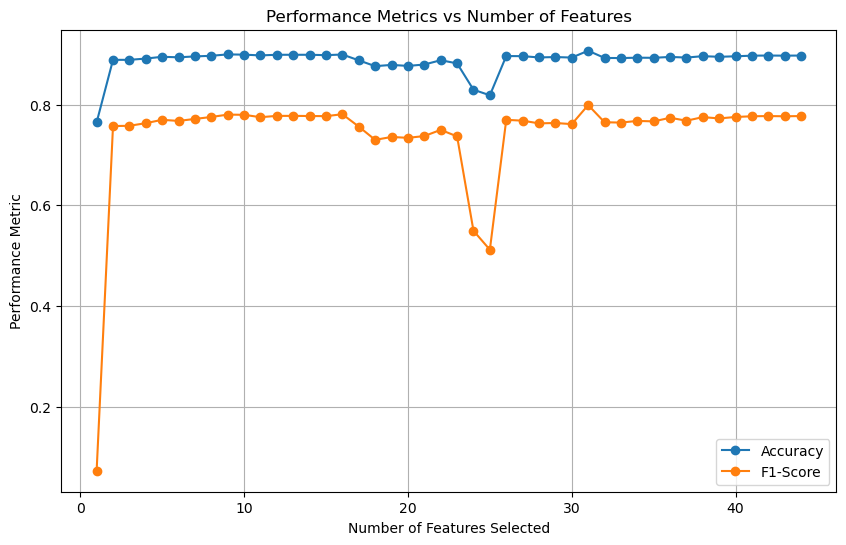

In [16]:
# make empty lists to store performance metrics
accuracies = []
f1_scores = []

# get the total number of features
num_features = X_train.shape[1]

# create a loop to eliminate features and find the best feature 
for i in range(num_features, 0, -1):  
    # create RFE model 
    rfe = RFE(model, n_features_to_select=i)
    
    # fit RFE on the train set
    rfe.fit(X_train, y_train)
    
    # make predictions on the test set
    y_test_pred = rfe.predict(X_test)
    
    # calculate accuracy and F1-score
    acc = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # append the results to the empty lists created
    accuracies.append(acc)
    f1_scores.append(f1)

# visualise the accuracy and F1-score to select features
plt.figure(figsize=(10, 6))

plt.plot(range(num_features, 0, -1), accuracies, label='Accuracy', marker='o')
plt.plot(range(num_features, 0, -1), f1_scores, label='F1-Score', marker='o')

plt.xlabel('Number of Features Selected')
plt.ylabel('Performance Metric')
plt.title('Performance Metrics vs Number of Features')
plt.legend()
plt.grid(True)
plt.show()

From this plot, if we consider to maximize performance with minimum numbers of feature, we select **5 features.**

In [17]:
# define number of the previously selected features
features = 5 

# perform RFE with the selected number of features
rfe = RFE(model, n_features_to_select=features)

# fit RFE on the train set
rfe.fit(X_train, y_train)

# get the mask of retained features (True for kept features)
retained_mask = rfe.support_

# find the names of the retained features
retained_features = X_train.columns[retained_mask]
print("Retained Features:", retained_features)

Retained Features: Index(['BankruptcyHistory', 'PreviousLoanDefaults', 'BaseInterestRate',
       'InterestRate', 'TotalDebtToIncomeRatio'],
      dtype='object')


So after eliminating features with RFE, the retained features are 'BankruptcyHistory', 'PreviousLoanDefaults', 'BaseInterestRate', 'InterestRate', and 'TotalDebtToIncomeRatio'

## Build a KNN classification model

### Build 1-NN classifier
1. Select the features identifed for this task
2. Build 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. 

#### Select features 

In [18]:
# create dataset with the defined retained_features
X_train_rfe = X_train[retained_features]
X_test_rfe = X_test[retained_features]

#### Find accuracy & F1-score (RFE) on test data

In [19]:
# create the 1-NN classifier
knn = KNeighborsClassifier(n_neighbors=1)

# train the classifier on the train data
knn.fit(X_train_rfe, y_train)

# create predictions on the test data
y_test_pred = knn.predict(X_test_rfe)

# calculate accuracy and F1-score on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test F1-Score: {test_f1_score}")

Test Accuracy: 0.8535175879396985
Test F1-Score: 0.691371095817893


#### Find accuracy & F1-score (RFE) on train data

In [20]:
# create predictions on the train data
y_train_pred = knn.predict(X_train_rfe)

# calculate accuracy and F1-score on the train data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Train F1-Score: {train_f1_score}")

# compare the metrics to check for overfitting
if train_accuracy > test_accuracy and train_accuracy - test_accuracy > 0.1:
    print("The model is possibly overfitting.")
else:
    print("The model is not overfitting.")


Train Accuracy: 1.0
Train F1-Score: 1.0
The model is possibly overfitting.


From the performance metrics above, we can see that both the accuracy and F1-score for the training data is 1.0 which means that the model performs the classification perfectly. This shows that the model has memorised the training data and possibly the data’s noise as well. 

Meanwhile, the accuracy and F1-score for the test set is much lower than the training data. Particularly, the large difference between the training and testing data in the F1-score (from 1.0 to 0.6914) indicates that the model does not generalise well towards unseen data, which affects the accuracy of precision and recall.

Therefore, the model is likely overfitting. The model's high precision during training is not reflected on the test data, resulting in poorer real-world performance. A cross validation needs to be undertaken to mitigate this issue.

### Use the grid search and cross validation techniques to study the performance change with respect to the hyperparameter K 
1. User grid search to search K in the range (1, 30) both inclusive with 5-fold cross validation. The performance metric used for search is accuracy.
2. Visualise the performance change with respect to K using a line chart. Report the two performance metrics for the best case.

#### Grid search and cross validation

In [21]:
# define the parameter grid (with range from 1 to 30)
param_grid = {'n_neighbors': list(range(1, 31))}

# perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the model on the train set
grid_search.fit(X_train_rfe, y_train)

# find the best K value and the best performance metric
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

print(f"Best K value: {best_k}")
print(f"Best cross-validated accuracy: {best_accuracy}")

Best K value: 27
Best cross-validated accuracy: 0.8903266331658293


#### Visualisation

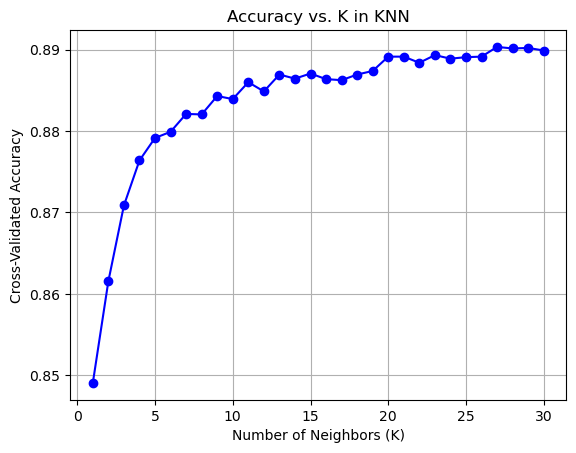

In [22]:
# get the accuracy scores for all values of K
k_values = list(range(1, 31))
mean_accuracies = grid_search.cv_results_['mean_test_score']

# visualise the accuracy scores with respect to K
plt.plot(k_values, mean_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy vs. K in KNN')
plt.grid(True)
plt.show()

From the plot, we can observe that accuracy improves as K increases up until a point, indicating that slightly larger neighborhoods may help the model generalise better,

#### Report the performance metrics with the best K-values

In [23]:
# Train the KNN model using the best K value
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_rfe, y_train)

# Make predictions on the testing data
y_test_pred = best_knn.predict(X_test_rfe)

# Calculate accuracy and F1-score for the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)

print(f"Test Accuracy with best K: {test_accuracy}")
print(f"Test F1-Score with best K: {test_f1_score}")

Test Accuracy with best K: 0.892713567839196
Test F1-Score with best K: 0.7642186637217007


### Study how the distance metrics affect the model performance 
1. Change the distance metric parameter to 3 distance types: 'euclidean'(also l2), 'l1', and 'cosine', respectively, and visualise the model performance with these 3 distances, using a bar chart for both accuracy and f1 scores.
2. Compare the performance metrics, which is the best? Which is the worst?

#### Find accuracy and F1-score with the distance metrics

In [24]:
# define distance metrics to test
distance_metrics = ['euclidean', 'manhattan', 'cosine']

# create empty dictionaries to store the results
accuracy_results = {}
f1_results = {}

# loop through each distance metric
for metric in distance_metrics:
    # create a KNN model with the defined distance metric
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    
    # train the model
    knn.fit(X_train, y_train)
    
    # create predictions on the testing set
    y_test_pred = knn.predict(X_test)
    
    # calculate accuracy and F1-score
    acc = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # store the results
    accuracy_results[metric] = acc
    f1_results[metric] = f1

# display result comparison
print("Accuracy Results:", accuracy_results)
print("F1-Score Results:", f1_results)

Accuracy Results: {'euclidean': 0.8819095477386935, 'manhattan': 0.8804020100502512, 'cosine': 0.864070351758794}
F1-Score Results: {'euclidean': 0.738015607580825, 'manhattan': 0.7340782122905027, 'cosine': 0.7029104887424492}


#### Visualise and compare the performance metrics

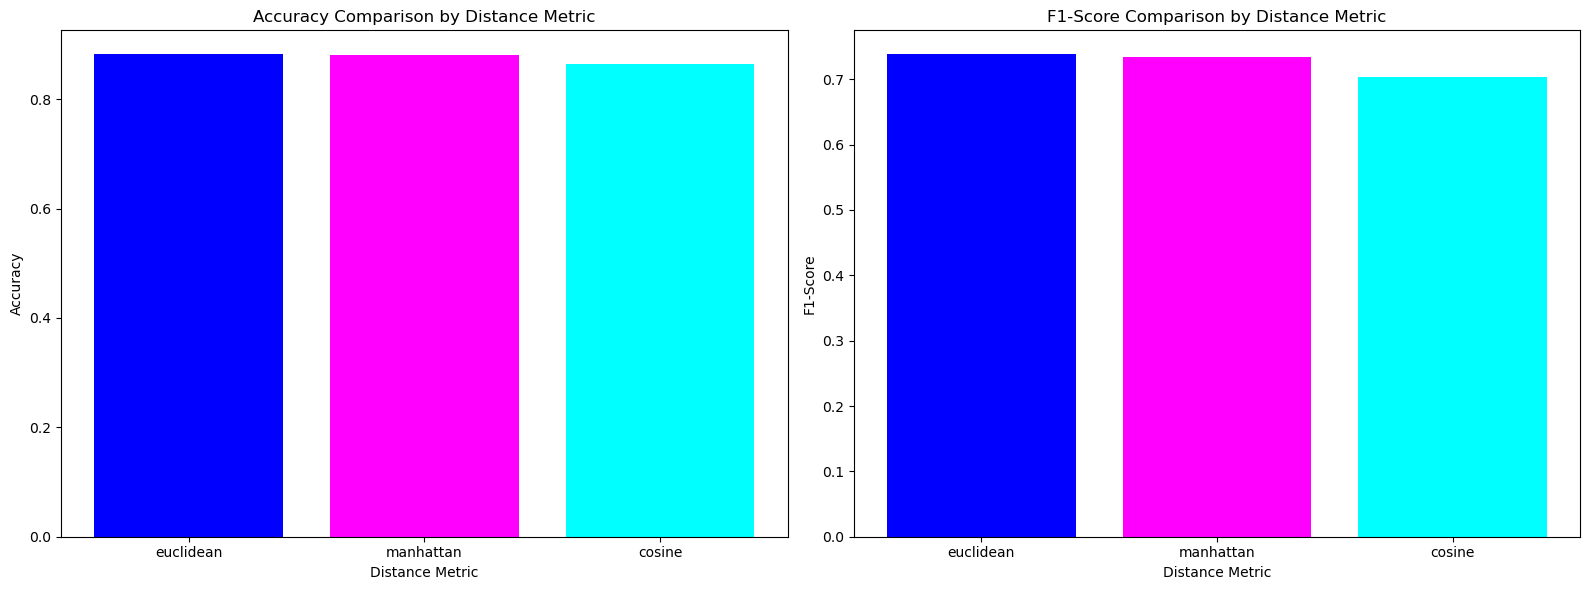

In [25]:
# create the figure 
plt.figure(figsize=(16, 6))

# first subplot for accuracy 
plt.subplot(1, 2, 1)  
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['blue', 'magenta', 'cyan'])
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison by Distance Metric')

# second subplot for F1-score
plt.subplot(1, 2, 2)  
plt.bar(f1_results.keys(), f1_results.values(), color=['blue', 'magenta', 'cyan'])
plt.xlabel('Distance Metric')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison by Distance Metric')
plt.tight_layout()

# display plots
plt.show()

These plots suggest that there are no significant differences between the distance metrics in both performance metrics. 
Generally, the distance metrics in the accuracy score are higher than those in f1-score.

In this case, the **Euclidean (accuracy)** distance has the **best** balance between accuracy and F1-Score, though accuracy is still higher.
Followed by the Manhattan metric, suggesting that they perform well in identifying the majority class but may need improvement in handling minority classes.

Meanwhile, the largest gap can be seen in the **cosine metric (f1-score)**, which indicates that it performs the **worst**, even though overall its accuracy is still decent.

Ultimately, to decide which performance metric is more useful to determine loan approval, we have to check if the classes are balanced or imbalanced.

In [26]:
# check classes balance
print(data['LoanApproved'].value_counts())

LoanApproved
0    15160
1     4740
Name: count, dtype: int64


We can see that there is a class imbalance in our data. 

Although the Euclidean in the accuracy has the best result, in a real-world scenario, relying on **Euclidean in the F1-score** could be more beneficial to avoid missing out on minority class predictions. It generally reflects the model performance better when certain types of errors are more important to avoid (as it balances precision and recall).